## Amoeba Steve's Fuzzy Logic

This notebook demonstrates how to use fuzzy logic for Artificial Life. Suppose there is an Amoeba named Steve and he needs to make inferences about his environment to decide what to do next. How can he do that? With fuzzy logic!

**Note**: All of the content for this notebook comes from "Neuro-Fuzzy and Soft Computing: A Computational Approach to Learning and Machine Intelligence" by Jang et al.

### Introduction
A *classical* set is a set with a crisp boundary. For example, a classical set $A$ of real numbers greater than 6 can be expressed as:

$$
A = \{x | x > 6\}
$$

where there is a clear, unambigious boundary 6 such that if $x$ is greater than this number, then $x$ belongs to the set $A$; otherwise $x$ does not belong to the set.

In contrast to a classical set, a **fuzzy set**, as the name implies, is a set without a crips boundary. That is, the transition from "belong to a set" to "not belong to a set" is gradual, and this smooth transition is characterized by **membership functions**.

### Basic Definitions

### Fuzzy Sets and membership functions.

If *X* is a collection of objects denoted generically by *x*, then a **fuzzy set** *A* in *X* us defined as a set of ordered pairs:

$$
A = \{(x, \mu_{A}(x)) | x \in X\}
$$

where $\mu_{A}(x)$ is called the **membership function** (or **MF** for short) for the fuzzy set $A$. The MF maps each element of X to a membership grade between 0 and 1.

Usually $X$ is referred to as the **universe of discourse** or **universe**.

### Fuzzy sets with a continous universe

Let $X = \R^{+}$ be the set of possible light intensities Amoeba Steve might experience. Then the fuzzy set $B$ = "dim light" may be expressed as:

$$
B = \{(x, \mu_{B}(x)) | x \in X\}
$$

where

$$
\mu_{B}(x) = \frac{1}{1 + |\frac{x - 45}{15}|^{2}}
$$

In practice, when the universe of discourse $X$ is a continous space, we usually partition $X$ into several fuzzy sets whos MFs cover $X$ in a more or less uniform manner. These fuzzy sets, which carry names that conform to adjectives appearing in our daily linguistic usage, such as "large", "medium", or "small", are called **linguistic values** or **linguistic labels**. Thus, the universe of discourse $X$ is often called the **linguistic variable**.

### Linguistic Variables and Linguistic Values

Suppose that $X$ = "Light Intensity". Then we can define the fuzzy sets "dark", "dim", and "bright" that are characterized by MFs $\mu_{dark}(x)$, $\mu_{dim}(x)$, and $\mu_{bright}(x)$. If "light intensity" assumes the value of "dark", then we have the expression "light intensity is dark" and so forth for the other values. See below for a visualization of the universe of discourse "Light Intensity" is totally covered by MFs and the transition between one MF to another is smooth and gradual.

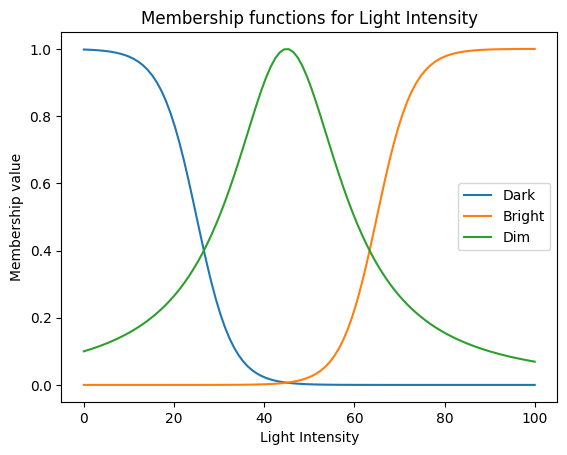

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.mf.sigmoid import Sigmoid
from fuzzylogic.mf.bell import Bell

# Define the membership functions
dark_mf = Sigmoid(-0.25, 25)
bright_mf = Sigmoid(0.25, 65)
dim_mf = Bell(45, 15, 1)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, dark_mf(x), label="Dark")
plt.plot(x, bright_mf(x), label="Bright")
plt.plot(x, dim_mf(x), label="Dim")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

### Operations on Fuzzy Sets

Union, intersection, and complement are the most basic operations on classical sets. We can do the same for fuzzy sets.

#### Union

The **union** of two fuzzy sets $A$ and $B$ is a fuzzy set $C$, written as $C = A \cup B$ or $C = A \lor B$ whos MF is realted to those of $A$ and $B$ by:

$$
\mu_{C}(x) = max(\mu_{A}(x), \mu_{B}(x)) = \mu_{A}(x) \lor \mu_{B}(x)
$$

Shown below is the set "Dark or Bright" to illustrate this concept.

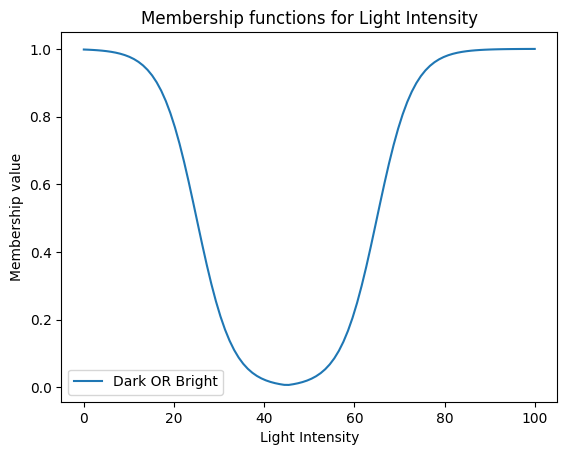

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.connectives.connectives import Or

# Define the membership functions
dark_or_bright_mf = Or.combine(dark_mf, bright_mf)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, dark_or_bright_mf(x), label="Dark OR Bright")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

#### Intersection

The **intersection** of two fuzzy sets $A$ and $B$ is a fuzzy set $C$, written as $C = A \cap B$ or $C = A \land B$ whos MF is realted to those of $A$ and $B$ by:

$$
\mu_{C}(x) = min(\mu_{A}(x), \mu_{B}(x)) = \mu_{A}(x) \land \mu_{B}(x)
$$

Shown below is the set "Dark and Bright" to illustrate this concept.

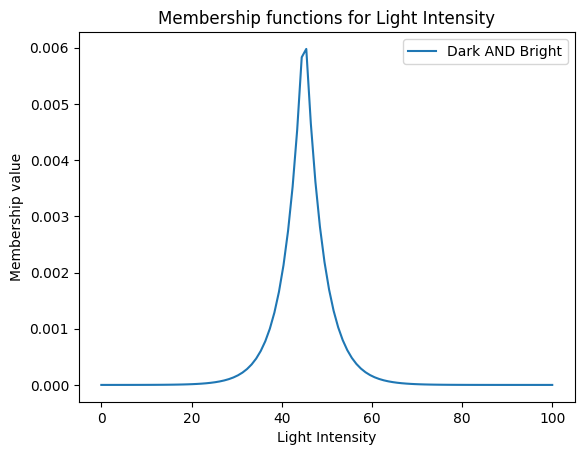

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.connectives.connectives import And

# Define the membership functions
dark_and_bright_mf = And.combine(dark_mf, bright_mf)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, dark_and_bright_mf(x), label="Dark AND Bright")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

As we can see, the linguistic concept "Dark and Bright" doesn't really make sense over the universe of discourse, where only a small section of $X$ belongs to this set.

#### Complement

The **compliemnt** of fuzzy set $A$, denoted by $\bar{A}$ ($\lnot{A}$) is defined as:

$$
\mu_{\bar{A}}(x) = 1 - \mu_{A}(x)
$$

See the illustration for the concept "Not Dark"

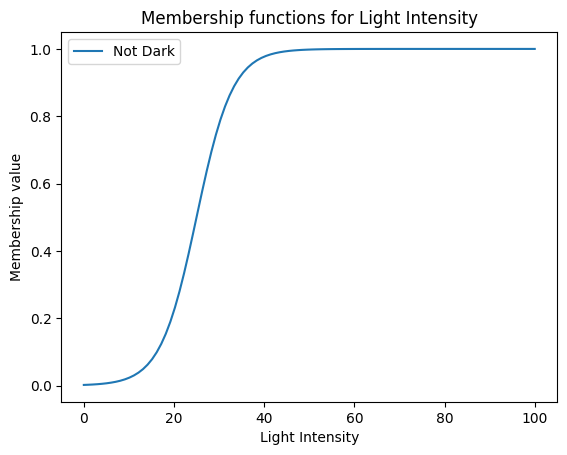

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.hedges.hedges import Not

# Define the membership functions
not_dark_mf = Not.transform(dark_mf)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, not_dark_mf(x), label="Not Dark")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

#### Linguistic Values depend on Definitions

The last piece to highlight about linguistic values are that they depend strictly on how the MFs are defined. While "Not Dark and Not Bright" might linguistically be similar to the concept "dim", the way we have defined "dim" previously uses a different MF, so the two terms aren't the exact same.

See the illustration below.

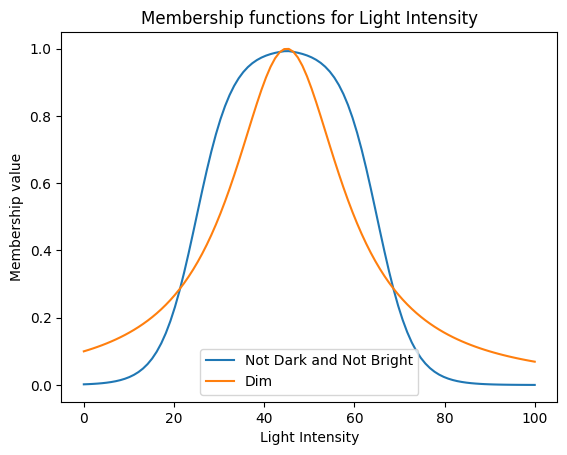

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.hedges.hedges import Not
from fuzzylogic.connectives.connectives import And

# Define the membership functions
not_dark_and_not_bright_mf = And.combine(not_dark_mf, Not.transform(bright_mf))

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, not_dark_and_not_bright_mf(x), label="Not Dark and Not Bright")
plt.plot(x, dim_mf(x), label="Dim")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

### Fuzzy Relations

Let $X$ and $Y$ be two universes of discourse. Then:

$$
R = \{((x, y), \mu_{R}(x, y)) | (x, y) \in X \times Y\}
$$

is a **binary fuzzy relation** in $X \times Y$. With this two dimensional MF, we can express concepts like "If $x$ is $A$, then $y$ is $B$" We can combine fuzzy relations on different product spaces through a compositon operation. The best known is the **max-min composition** defined by Zadeh.

### Max-Min Composition

Let $R_{1}$ and $R_{2}$ be two fuzzy relations defined on $X \times Y$ and $Y \times Z$ respectively. The **max-min composition** of $R_{1}$ and $R_{2}$ is defined by:

$$
\mu_{R_{1} \circ R_{2}}(x, z) = \lor_{y}[\mu_{R_{1}}(x, y) \land \mu_{R_{2}}(y, z)]
$$

When $R_{1}$ and $R_{2}$ are expressed as relation matrices, the calculation of $R_{1} \circ R_{2}$ is almost the same as matrix multiplication, except that $\times$ and $+$ are replaced by $\land$ and $\lor$ respectively.

### Max-Product Composition

Assuming the same notation used in the definition of max-min composition, we can define **max-product composition** as follows:

$$
\mu_{R_{1} \circ R_{2}}(x, z) = \lor_{y}[\mu_{R_{1}}(x, y)\mu_{R_{2}}(y, z)]
$$

Note that in general we can have any (T-CoNorm)-(T-Norm) composition that interprets the OR and AND operators.

### Linguistic Variables

If *age* is interpreted as a linguistic variable, then its term set $T(age)$ could be:

$T(age)$ = {*young*, *not young*, *very young*, *not very young*, ..., *middle aged*, *not middle aged*, ..., *old*, *not old*, *very old*, *more or less old*, ...}

where each term in $T(age)$ is characterised by a fuzzy set in a universe of discourse. We can see that the term set consists of serveral **primary terms** (*young*, *middle aged*, *old*) modified by the **negation** ("not") and/or **hedges** (*very*, *more or less*, *extremely* and so forth) and linked by **connectives** such as *and*, *or*, *either*, and *neither*.  We have already seen negation and connectives, so let's examine hedges.

### Concentration and Dilation of linguistic values

**Concentration** is defined as:

$$
CON(A) = A^{2}
$$

while **dilation** is defined as:

$$
DIL(A) = A^{0.5}
$$

Concentration could be the hedge *very* while dilation could be the hedge *more or less*.

See the illustration below for how hedges change the membership function.

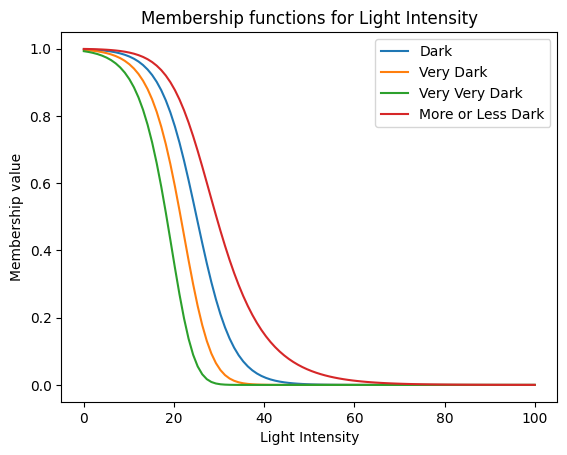

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.mf.sigmoid import Sigmoid
from fuzzylogic.hedges.hedges import Con, Dil

# Define the membership functions
dark_mf = dark_mf = Sigmoid(-0.25, 25)
very_dark_mf = Con.transform(dark_mf)
very_very_dark_mf = Con.transform(very_dark_mf)
more_or_less_dark_mf = Dil.transform(dark_mf)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, dark_mf(x), label="Dark")
plt.plot(x, very_dark_mf(x), label="Very Dark")
plt.plot(x, very_very_dark_mf(x), label="Very Very Dark")
plt.plot(x, more_or_less_dark_mf(x), label="More or Less Dark")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

Notice how the hedges alter the original MF. Combined with connectives, we can do some interesting functions, like "dim but not too dim"

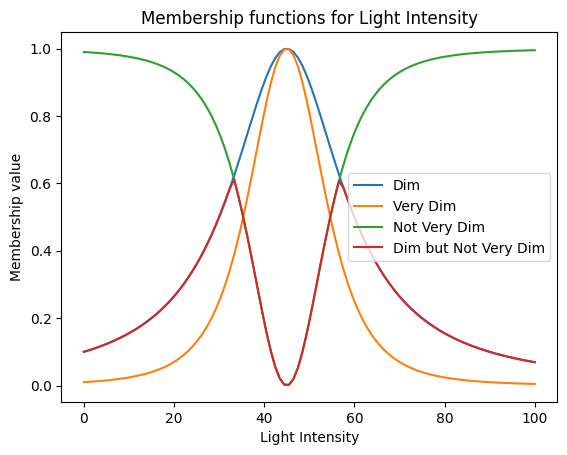

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.mf.bell import Bell
from fuzzylogic.hedges.hedges import Con, Dil, Not
from fuzzylogic.connectives.connectives import And

# Define the membership functions
dim_mf = Bell(45, 15, 1)
very_dim_mf = Con.transform(dim_mf)
not_very_dim_mf = Not.transform(very_dim_mf)
dim_but_not_very_dim_mf = And.combine(dim_mf, not_very_dim_mf)

# Plot the membership functions
x = np.linspace(0, 100, 100)

plt.plot(x, dim_mf(x), label="Dim")
plt.plot(x, very_dim_mf(x), label="Very Dim")
plt.plot(x, not_very_dim_mf(x), label="Not Very Dim")
plt.plot(x, dim_but_not_very_dim_mf(x), label="Dim but Not Very Dim")
plt.xlabel('Light Intensity')
plt.ylabel('Membership value')
plt.title('Membership functions for Light Intensity')
plt.legend()
plt.show()

### Contrast Intensifier

The operation of **contrast intensification** on a linguistic value $A$ is defined by:

$$
INT(A) = 
\begin{cases}
2A^2 & \text{for } 0 \leq \mu_A(x) \leq 0.5 \\
\lnot 2(\lnot A)^{2} & \text{for } 0.5 \leq \mu_A(x) \leq 1
\end{cases}
$$

The contrast intensifier has the effect of reducing the fuzziness of linguistic value $A$. The inverse operator of contrast intensifier is contrast diminisher DIM, which is not currently implemented.

### Fuzzy If-Then Rules

A **fuzzy if-then rule** (also known as **fuzzy rule**, **fuzzy implication**, or **fuzzy conditional statement**) assumes the form:

$$
\text{if } x \text{ is } A \text{ then } y \text{ is } B
$$

Where $A$ and $B$ are linguistic values defined by fuzzy sets on universes of discourse $X$ and $Y$ respectively. Often, "$x$ is $A$" is called the **antecedent** or **premise** while "$y$ is $B$" is called the **consequence** or **conclusion**. Examples of fuzzy if-then rules are widespread in our daily linguistic expressions:

* If pressure is high, then volume is small
* If the road is slippery, then driving is dangerous
* If a tomato is red, then it is ripe
* If the speed is high, then apply the brake a little

### Fuzzy Reasoning

Fuzzy reasoning, also known as approximate reasoning, is an inference procedure that derives conclusions from a set of fuzzy if-then rules and known facts. For instance, if $A$ is identified with "the tomato is red" and $B$ with "the tomato is ripe" then if it is true that "the tomato is red" it is also true that "the tomato is ripe". This concept is illustrated as follows:

<div align="center">

\begin{array}{|l|l|}
\hline
\textbf{Type} & \textbf{Statement} \\
\hline
\text{premise 1 (fact):} & x \text{ is } A \\
\text{premise 2 (rule):} & \text{if } x \text{ is } A \text{ then } y \text{ is } B \\
\hline
\text{consequence (conclusion):} & y \text{ is } B \\
\hline
\end{array}

</div>

We can also do this in a fuzzy manner. If we have the rule "if the tomato is red, then it is ripe", and we know that "the tomato is more or less red", then we may infer that "the tomato is more or less ripe". Which is written as:

<div align="center">

\begin{array}{|l|l|}
\hline
\textbf{Type} & \textbf{Statement} \\
\hline
\text{premise 1 (fact):} & x \text{ is } A' \\
\text{premise 2 (rule):} & \text{if } x \text{ is } A \text{ then } y \text{ is } B \\
\hline
\text{consequence (conclusion):} & y \text{ is } B' \\
\hline
\end{array}

</div>

### Approximate Reasoning

Let $A$, $A'$, and $B$ be fuzzy sets of $X$, $X$, and $Y$ respectively. Assume that the fuzzy implication $A \rightarrow B$ is expressed as a fuzzy relation $R$ on $X \times Y$. Then the fuzzy set $B$ is induced by $x$ is $A'$ and the fuzzy rule "if $x$ is $A$ then $y$ is $B$" is defined by:

$$
B' = A' \circ R = A' \circ (A \rightarrow B)
$$

which in the simplest case:

$$
\mu_{B'}(y) = [\lor_{x}(\mu_{A'}(x) \land \mu_{A}(x))] \land \mu_{B}(y) = \omega \land \mu_{B}(y)
$$

In other words, first we find the degree of match $\omega$ as the maximum of $\mu_{A'}(x) \land \mu_{A}(x)$. This effectively clips the MF $B$ and we can interpret $\omega$ as the degree of belief for the actecedent part of the rule.

### Single Rule with Multiple Antecedents

A fuzzy if-then rule with two antecedents is usually written as "if $x$ is $A$ and $y$ is $B$ then $z$ is $C$". This fuzzy rule can be in a simpler form $A \times B \rightarrow C$. Using Mamdani's fuzzy implication function the resulting $C'$ can be expressed as:

$$
C' = (A' \times B') \circ (A \times B \rightarrow C)
$$

and thus:

$$
\mu_{C'}(z) = \{\lor_{x}[\mu_{A'}(x) \land \mu_{A}(x)]\} \land \{\lor_{y}[\mu_{B'}(y) \land \mu_{B}(y)]\} \land \mu_{C}(z) = (\omega_{1} \land \omega_{2}) \land \mu_{C}(z)
$$

See the visualization below for the rule "If someone is tall and someone is young, then the chance they play basketball is high". Notice the degree of membership for each fuzzy set and the clipped MF for "play basketball is high". We also demonstrate the fuzzy surface to show the membership for any ($x$, $y$) pair as well as the defuzzification of the membership function, which we will discuss in detail later.

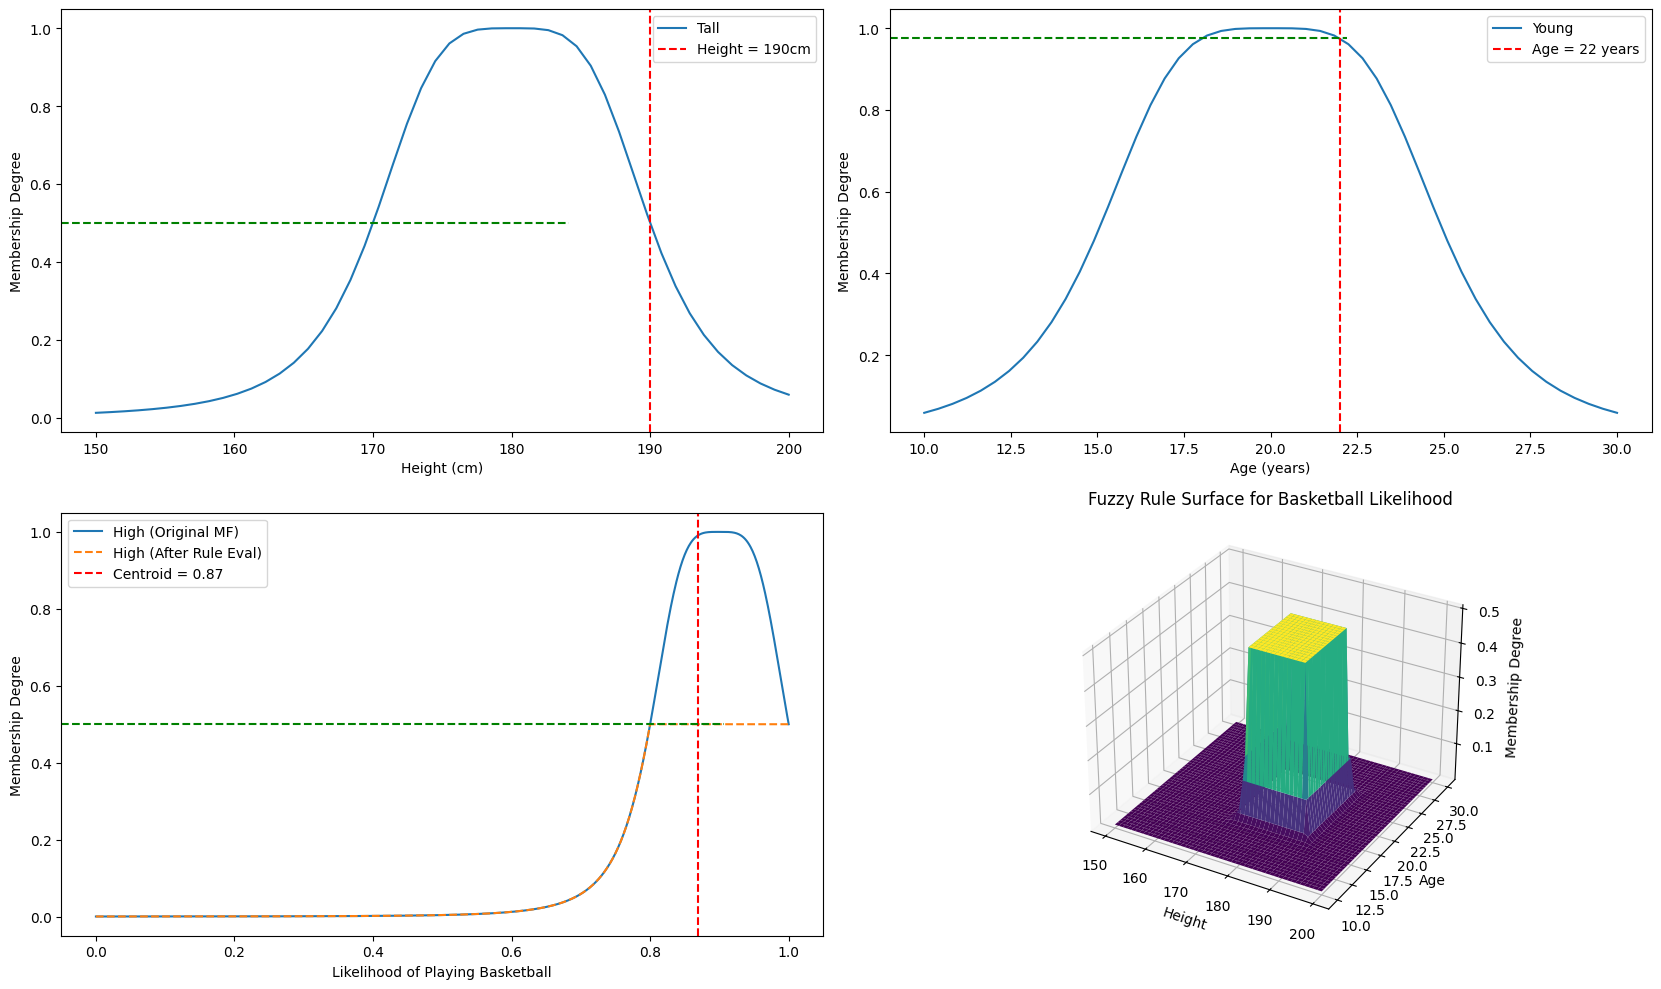

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.mf.bell import Bell
from fuzzylogic.mf.singleton import FuzzySingleton
from fuzzylogic.tnorms.tnorms import MinimumTNorm
from fuzzylogic.connectives.connectives import And

# Define fuzzy sets
tall_mf = Bell(center=180, width=10, intensity=2)
young_mf = Bell(center=20, width=5, intensity=2)
high_mf = Bell(center=0.9, width=0.1, intensity=2)

# Define the crisp inputs
height_crisp = 190  # cm
age_crisp = 22  # years

# Define a grid of height and age values
x_tall = np.linspace(150, 200, 50)
x_young = np.linspace(10, 30, 50)
H, A = np.meshgrid(x_tall, x_young)

# Use FuzzySingleton to represent height_crisp
height_singleton = FuzzySingleton(value=height_crisp)
age_singleton = FuzzySingleton(value=age_crisp)

# Degree of membership for each fuzzy set aka omega
tall_degree = MinimumTNorm.combine(tall_mf, height_singleton)(height_crisp)
young_degree = MinimumTNorm.combine(young_mf, age_singleton)(age_crisp)

# Rule evaluation using AND connective aka Firing Strength
rule_strength = np.minimum(tall_degree, young_degree)

# Using Mamdani's implication
cut_high_mf = lambda x: np.minimum(high_mf(x), rule_strength)

# Centroid defuzzification
x_high = np.linspace(0, 1, 1000)
y_values = [cut_high_mf(x) for x in x_high]
centroid = np.sum(x_high * y_values) / np.sum(y_values)

# Compute the rule strength for each combination of height and age
Z = np.zeros_like(H)
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        tall_degree_ = tall_mf(H[i, j])
        young_degree_ = young_mf(A[i, j])
        rule_strength_ = np.minimum(tall_degree_, young_degree_)
        Z[i, j] = cut_high_mf(rule_strength_)

# Plotting

plt.figure(figsize=(25, 10))

# Tall MF
plt.subplot(2, 3, 1)
plt.plot(x_tall, tall_mf(x_tall), label="Tall")
plt.axvline(x=height_crisp, color="red", linestyle="--", label=f"Height = {height_crisp}cm")
plt.axhline(y=tall_degree, color="green", linestyle="--", xmax=(height_crisp - 150) / 60)
plt.xlabel("Height (cm)")
plt.ylabel("Membership Degree")
plt.legend()

# Young MF
plt.subplot(2, 3, 2)
plt.plot(x_young, young_mf(x_young), label="Young")
plt.axvline(x=age_crisp, color="red", linestyle="--", label=f"Age = {age_crisp} years")
plt.axhline(y=young_degree, color="green", linestyle="--", xmax=(age_crisp - 10) / 20)
plt.xlabel("Age (years)")
plt.ylabel("Membership Degree")
plt.legend()

# High MF and Rule Evaluation
plt.subplot(2, 3, 4)
plt.plot(x_high, high_mf(x_high), label="High (Original MF)")
plt.plot(x_high, [cut_high_mf(x) for x in x_high], label="High (After Rule Eval)", linestyle='--')
plt.axvline(x=centroid, color="red", linestyle="--", label=f"Centroid = {centroid:.2f}")
plt.axhline(y=rule_strength, color="green", linestyle="--", xmax=centroid)
plt.xlabel("Likelihood of Playing Basketball")
plt.ylabel("Membership Degree")
plt.legend()

# Fuzzy Surface Visualization
ax = plt.subplot(2, 3, 5, projection='3d')
ax.plot_surface(H, A, Z, cmap='viridis')
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Membership Degree')
ax.set_title('Fuzzy Rule Surface for Basketball Likelihood')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

### Multiple Rules with Multiple Antecedents

The interpretation of multiple fuzzy rules is usally taken as the union of the fuzzy relations corresponding to the fuzzy rules, demonstrated below:

<div align="center">

\begin{array}{|l|l|}
\hline
\textbf{Type} & \textbf{Statement} \\
\hline
\text{premise 1 (fact):} & x \text{ is } A' \text{ and } y \text{ is } B\\
\text{premise 2 (rule 1):} & \text{if } x \text{ is } A_{1} \text{ and } y \text{ is } B_{1} \text{ then } z \text{ is } C_{1} \\
\text{premise 2 (rule 2):} & \text{if } x \text{ is } A_{2} \text{ and } y \text{ is } B_{2} \text{ then } z \text{ is } C_{2} \\
\hline
\text{consequence (conclusion):} & z \text{ is } C' \\
\hline
\end{array}

</div>

How can we calculate $C'$?

$$
C' = (A' \times B') \circ (R_{1} \cup R_{2}) = [(A' \times B') \circ R_{1}] \cup [(A' \times B') \circ R_{2}] = C_{1}' \cup C_{2}'
$$

This is equivalent to the union of the rules "if $x$ is $A$ then $z$ is $C$" and "if $y$ is $B$ then $z$ is $C$".

Now lets see two rules in the context of our basketball player:

* If someone is tall and if someone is young then the chance of them playing basketball is high.
* If someone is very tall and if someone is young but not too young then the chance of them playing basket ball is high.

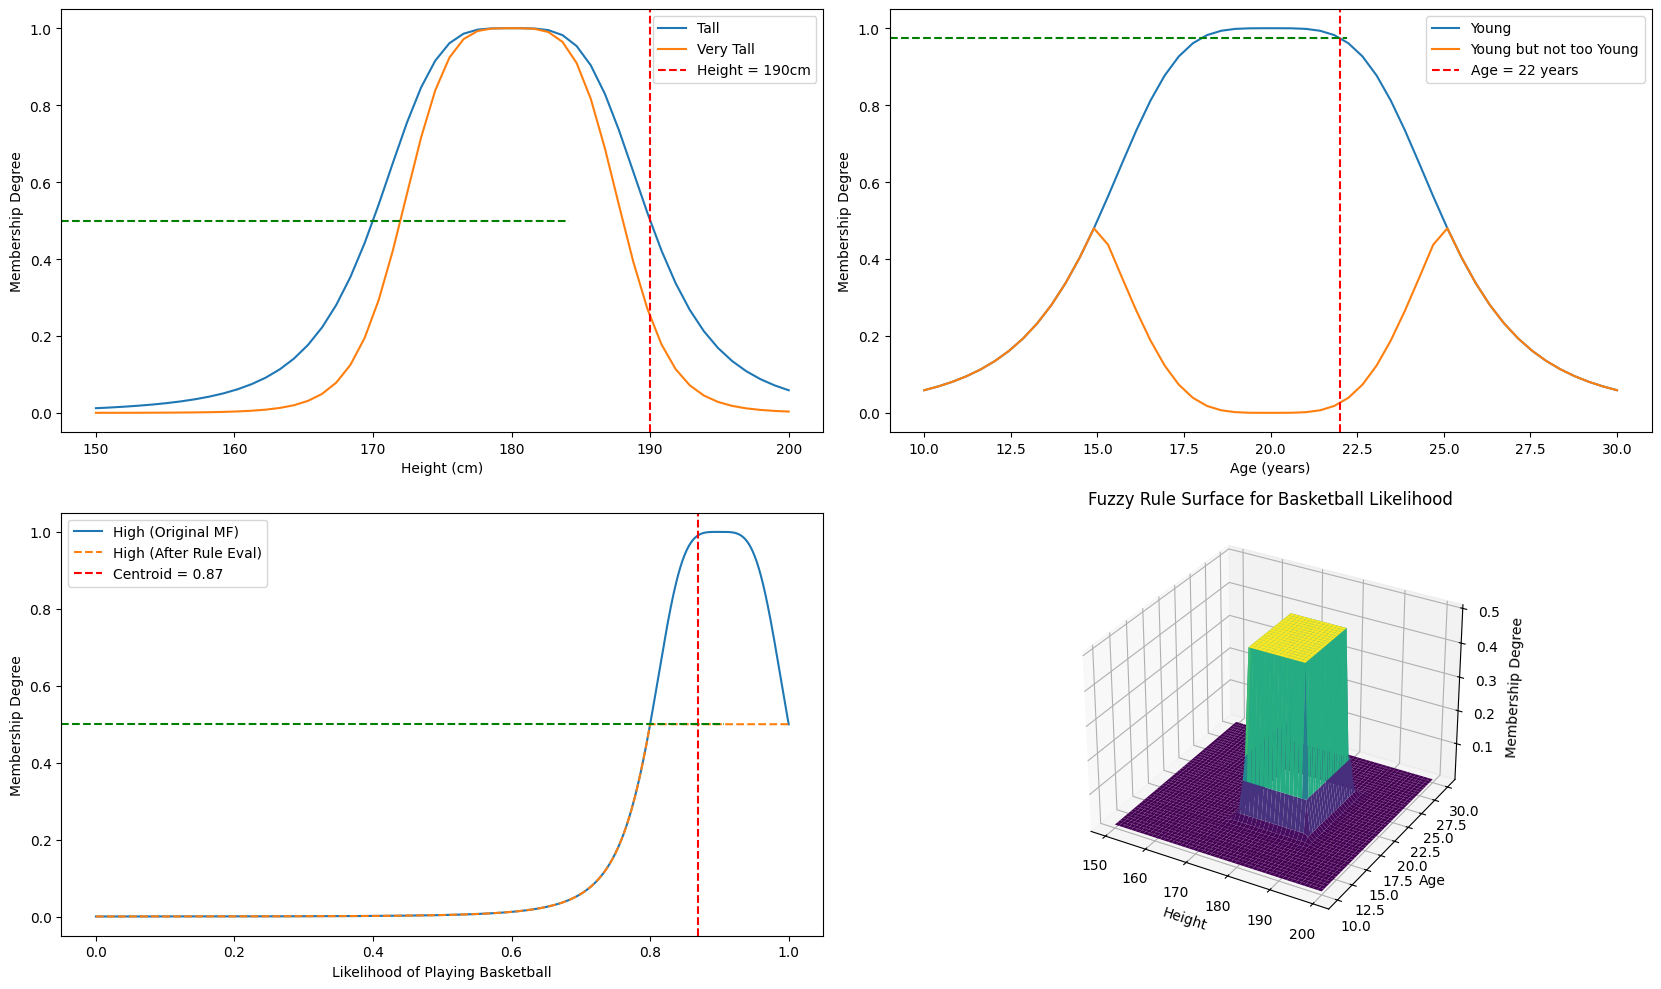

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from fuzzylogic.mf.bell import Bell
from fuzzylogic.mf.singleton import FuzzySingleton
from fuzzylogic.tnorms.tnorms import MinimumTNorm
from fuzzylogic.connectives.connectives import And
from fuzzylogic.hedges.hedges import Con, Not

# Define fuzzy sets
tall_mf = Bell(center=180, width=10, intensity=2)
very_tall_mf = Con.transform(tall_mf)
young_mf = Bell(center=20, width=5, intensity=2)
young_but_not_too_young_mf = And.combine(young_mf, Not.transform(young_mf))
high_mf = Bell(center=0.9, width=0.1, intensity=2)

# Define the crisp inputs
height_crisp = 190  # cm
age_crisp = 22  # years

# Define a grid of height and age values
x_tall = np.linspace(150, 200, 50)
x_young = np.linspace(10, 30, 50)
H, A = np.meshgrid(x_tall, x_young)

# Use FuzzySingleton to represent height_crisp
height_singleton = FuzzySingleton(value=height_crisp)
age_singleton = FuzzySingleton(value=age_crisp)

# Rule Number 1: If tall and young then high
# Degree of membership for each fuzzy set aka omega
tall_degree = MinimumTNorm.combine(tall_mf, height_singleton)(height_crisp)
young_degree = MinimumTNorm.combine(young_mf, age_singleton)(age_crisp)

# Rule evaluation using AND connective aka Firing Strength
rule_1_strength = np.minimum(tall_degree, young_degree)

# Using Mamdani's implication
clipped_rule_1 = lambda x: np.minimum(high_mf(x), rule_1_strength)

# Rule Number 2: If very tall and not too young then high
# Degree of membership for each fuzzy set aka omega
very_tall_degree = MinimumTNorm.combine(very_tall_mf, height_singleton)(height_crisp)
not_too_young_degree = MinimumTNorm.combine(young_but_not_too_young_mf, age_singleton)(age_crisp)

# Rule evaluation using AND connective aka Firing Strength
rule_2_strength = np.minimum(very_tall_degree, not_too_young_degree)

# Using Mamdani's implication
clipped_rule_2 = lambda x: np.minimum(high_mf(x), rule_2_strength)

# Max-min composition
cut_high_mf = lambda x: np.maximum(clipped_rule_1(x), clipped_rule_2(x))

# Centroid defuzzification
x_high = np.linspace(0, 1, 1000)
y_values = [cut_high_mf(x) for x in x_high]
centroid = np.sum(x_high * y_values) / np.sum(y_values)

# Compute the rule strength for each combination of height and age
Z = np.zeros_like(H)
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        tall_degree_ = tall_mf(H[i, j])
        very_tall_degree_ = very_tall_mf(H[i, j])
        young_degree_ = young_mf(A[i, j])
        not_too_young_degree_ = young_but_not_too_young_mf(A[i, j])
        rule_1_strength_ = np.minimum(tall_degree_, young_degree_)
        rule_2_strength_ = np.minimum(very_tall_degree_, not_too_young_degree_)
        Z[i, j] = cut_high_mf(np.maximum(rule_1_strength_, rule_2_strength_))

# Plotting

plt.figure(figsize=(25, 10))

# Tall MF
plt.subplot(2, 3, 1)
plt.plot(x_tall, tall_mf(x_tall), label="Tall")
plt.plot(x_tall, very_tall_mf(x_tall), label="Very Tall")
plt.axvline(x=height_crisp, color="red", linestyle="--", label=f"Height = {height_crisp}cm")
plt.axhline(y=tall_degree, color="green", linestyle="--", xmax=(height_crisp - 150) / 60)
plt.xlabel("Height (cm)")
plt.ylabel("Membership Degree")
plt.legend()

# Young MF
plt.subplot(2, 3, 2)
plt.plot(x_young, young_mf(x_young), label="Young")
plt.plot(x_young, young_but_not_too_young_mf(x_young), label="Young but not too Young")
plt.axvline(x=age_crisp, color="red", linestyle="--", label=f"Age = {age_crisp} years")
plt.axhline(y=young_degree, color="green", linestyle="--", xmax=(age_crisp - 10) / 20)
plt.xlabel("Age (years)")
plt.ylabel("Membership Degree")
plt.legend()

# High MF and Rule Evaluation
plt.subplot(2, 3, 4)
plt.plot(x_high, high_mf(x_high), label="High (Original MF)")
plt.plot(x_high, [cut_high_mf(x) for x in x_high], label="High (After Rule Eval)", linestyle='--')
plt.axvline(x=centroid, color="red", linestyle="--", label=f"Centroid = {centroid:.2f}")
plt.axhline(y=rule_1_strength, color="green", linestyle="--", xmax=centroid)
plt.xlabel("Likelihood of Playing Basketball")
plt.ylabel("Membership Degree")
plt.legend()

# Fuzzy Surface Visualization
ax = plt.subplot(2, 3, 5, projection='3d')
ax.plot_surface(H, A, Z, cmap='viridis')
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Membership Degree')
ax.set_title('Fuzzy Rule Surface for Basketball Likelihood')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

You'll notice that the overall rule surface, clipped MF, and defuzzification values don't change, but work out the rules yourself and see that the secondary rule isn't as strong as the first rule, so the first rule overpowers the rule logic under Mamdani Fuzzy Inference.

### Fuzzy Inference Systems

In the last section we had a defuzzification of the fuzzy set back into a crisp value, called **Fuzzy Inference**. Let's explore that now.

Note that basic fuzzy inference systems can take either fuzzy inputs or crips inputs (called Fuzzy Singletons), but the outputs it produces are always fuzzy sets. Sometimes it is necessary to have a crisp output, especially where a fuzzy inference system is used as a controller. Therefore, we need a method of **defuzzification** to extract a crisp value that best represents a fuzzy set.

#### Centroid of Area (COA):

$$
z_{COA} = \frac{\int_{Z}\mu_{A}(z)z dz}{\int_{Z}\mu_{A}(z)dz}
$$

where $\mu_{A}(z)$ is the aggregated output MF. This is the most widely adopted defuzzification strategy.

#### Bisector of Area (BOA):

$z_{BOA}$ satisfies:

$$
\int_{\alpha}^{z_{BOA}}\mu_{A}(z)dz = \int_{z_{BOA}}^{\beta}\mu_{A}(z)dz
$$

where $\alpha = \text{min}\{z | z \in Z\}$ and $\beta = \text{max}\{z | z \in Z\}$. That is, $z_{BOA}$ partions the retion into two regions with the same area.

#### Mean of Maximum (MOM):

$z_{MOM}$ is the average of the maximizing $z$ at which the MF reach a maximum $\mu$. In symbols:

$$
z_{MOM} = \frac{\int_{Z'}z dz}{\int_{Z'}dz}
$$

#### Smallest of Maximum (SOM):

$z_{SOM}$ is the minimum of the maximizing $z$.

#### Largest of Maximum (LOM):

$z_{LOM}$ is the maximum of the maximizing $z$.


See the visualiztion below for how these defuzzification strategies differ.

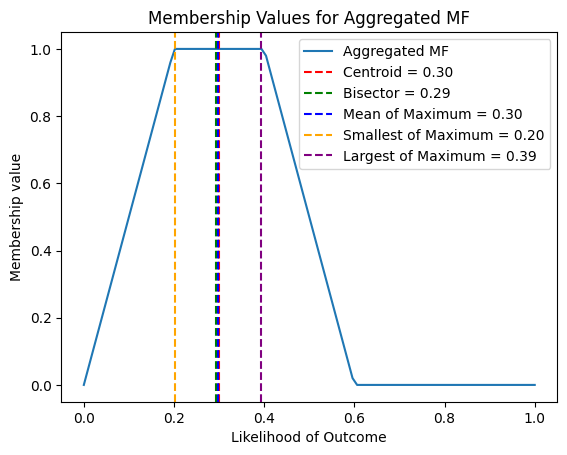

In [25]:
import matplotlib.pyplot as plt

from fuzzylogic.mf.trap import Trapezoid
from fuzzylogic.defuzz.defuzz import Centroid, Bisector, MeanOfMaximum, SmallestOfMaximum, LargestOfMaximum

# Define the membership functions
aggregated_mf = Trapezoid(0, 0.2, 0.4, 0.6)

# Plot the membership functions
x = np.linspace(0, 1, 100)

# Define the defuzzification methods
centroid_defuzz = Centroid.defuzz(x, aggregated_mf)
bisector_defuzz = Bisector.defuzz(x, aggregated_mf)
mom_defuzz = MeanOfMaximum.defuzz(x, aggregated_mf)
som_defuzz = SmallestOfMaximum.defuzz(x, aggregated_mf)
lom_defuzz = LargestOfMaximum.defuzz(x, aggregated_mf)

plt.plot(x, aggregated_mf(x), label="Aggregated MF")
plt.axvline(x=centroid_defuzz, color="red", linestyle="--", label=f"Centroid = {centroid_defuzz:.2f}")
plt.axvline(x=bisector_defuzz, color="green", linestyle="--", label=f"Bisector = {bisector_defuzz:.2f}")
plt.axvline(x=mom_defuzz, color="blue", linestyle="--", label=f"Mean of Maximum = {mom_defuzz:.2f}")
plt.axvline(x=som_defuzz, color="orange", linestyle="--", label=f"Smallest of Maximum = {som_defuzz:.2f}")
plt.axvline(x=lom_defuzz, color="purple", linestyle="--", label=f"Largest of Maximum = {lom_defuzz:.2f}")
plt.xlabel('Likelihood of Outcome')
plt.ylabel('Membership value')
plt.title('Membership Values for Aggregated MF')
plt.legend()
plt.show()

### Happy Modeling

Over the course of this notebook we have explored fuzzy sets and how we can manipulate them and define them mathematically to make inferences. Fuzzy systems can be quite powerful and importantly (compared to modern machine learning approaches) *explainable*, as any inference can be traced back through to understand why a decision was made. Fuzzy systems can be quite powerful!

#### TODO:

* Abstract Fuzzy Rules and their evaluation
* Abstract Composition (Max-Min, Max-Product, T-Conorm-T-Norm)
* Visualizing Fuzzy Surfaces
* Abstract Fuzzy Inference Systems
* Tests for Fuzzy Rules
* Tests for Composition
* ~~Abstract Connectives~~
* ~~Abstract Defuzzification~~
* ~~Abstract Hedges~~
* ~~Abstract Membership Functions~~
* ~~Abstract T-CoNorms~~
* ~~Abstract T-CoNorms~~
* ~~Tests for Connectives~~
* ~~Tests for defuzzification~~
* ~~Tests for Hedges~~
* ~~Tests for Membership Functions~~
* ~~Tests for T-CoNorms~~
* ~~Tests for T-Norms~~